In [ ]:
!pip install prophet

In [ ]:
# Import the required libraries and dependencies
import pandas as pd
from pathlib import Path
from prophet import Prophet
import datetime as dt
import numpy as np
%matplotlib inline

In [ ]:
vac_path = Path('country_vaccinations.csv')
vaccination_df = pd.read_csv(vac_path).dropna()
vaccination_df.loc[vaccination_df['country'] == 'Albania']

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
433,Albania,ALB,2021-02-18,3049.0,2438.0,611.0,1348.0,254.0,0.11,0.08,0.02,88.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
515,Albania,ALB,2021-05-11,622507.0,440921.0,181586.0,9548.0,12160.0,21.67,15.35,6.32,4233.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
516,Albania,ALB,2021-05-12,632676.0,444755.0,187921.0,10169.0,10870.0,22.02,15.48,6.54,3784.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
517,Albania,ALB,2021-05-13,638338.0,445402.0,192936.0,5662.0,9445.0,22.22,15.50,6.72,3288.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
518,Albania,ALB,2021-05-14,653330.0,448571.0,204759.0,14992.0,9662.0,22.74,15.61,7.13,3363.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,Albania,ALB,2022-02-07,2639523.0,1256409.0,1169470.0,5146.0,10183.0,91.88,43.73,40.71,3544.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
794,Albania,ALB,2022-02-14,2665804.0,1262067.0,1181246.0,3966.0,3754.0,92.79,43.93,41.12,1307.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
795,Albania,ALB,2022-02-15,2669695.0,1262935.0,1182883.0,3891.0,3779.0,92.93,43.96,41.17,1315.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
796,Albania,ALB,2022-02-16,2673183.0,1263745.0,1184292.0,3488.0,3746.0,93.05,43.99,41.22,1304.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...


In [ ]:
#Create a new frame with only highest total vaccinations from each country
highest_vac_df = vaccination_df.groupby('country').max()['total_vaccinations'].sort_values(ascending=False).head(50)
highest_vac_df

,total_vaccinations
country,
China,3.243599e+09
India,1.834501e+09
United States,5.601818e+08
Brazil,4.135596e+08
Indonesia,3.771089e+08
Japan,2.501880e+08
Bangladesh,2.436427e+08
Pakistan,2.193686e+08
Vietnam,2.031444e+08


In [ ]:
#Sum of total vaccianations in each country.
# Can show which country has the highest vaccination rate. List first 50 countries with highest vaccination rate
# Compare that with the country which has the highest death rate( if data is available)

vaccination_sum_df = vaccination_df.groupby('country').sum()['total_vaccinations'].sort_values(ascending=False).head(50)
vaccination_sum_df

,total_vaccinations
country,
India,3.200418e+11
United States,1.550138e+11
Brazil,7.637582e+10
China,4.858702e+10
Indonesia,4.272175e+10
Germany,3.898281e+10
United Kingdom,3.670817e+10
Turkey,3.361472e+10
France,3.217703e+10


<Axes: xlabel='country'>

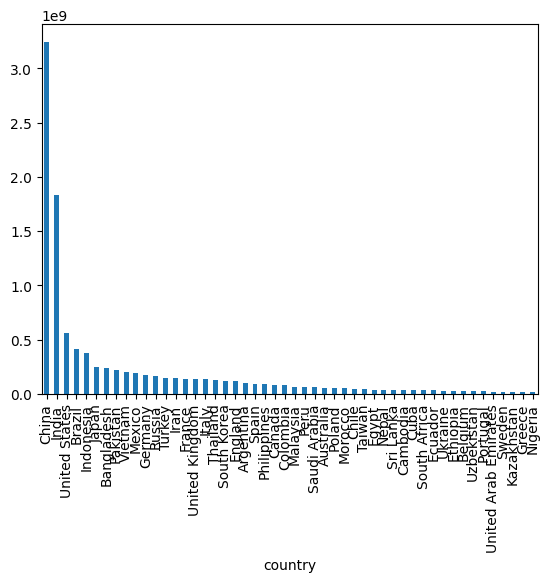

In [ ]:
# plot
highest_vac_df.plot(kind='bar')


In [ ]:
covid_path = Path('countries-aggregated.csv')
covid_df = pd.read_csv(covid_path).dropna()
covid_df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0
...,...,...,...,...,...
89659,2021-04-28,Zimbabwe,38191,35517,1565
89660,2021-04-29,Zimbabwe,38235,35594,1567
89661,2021-04-30,Zimbabwe,38257,35612,1567
89662,2021-05-01,Zimbabwe,38260,35620,1568


In [ ]:
#Sum of total_deaths in each country
covid_sum_df = covid_df.groupby('Country').sum()['Deaths'].sort_values(ascending=False).head(100)
covid_sum_df

,Deaths
Country,
US,107764977
Brazil,60861891
Mexico,37057016
India,37009228
United Kingdom,25474727
...,...
Zambia,171894
Cameroon,165914
Senegal,157432


<Axes: xlabel='Country'>

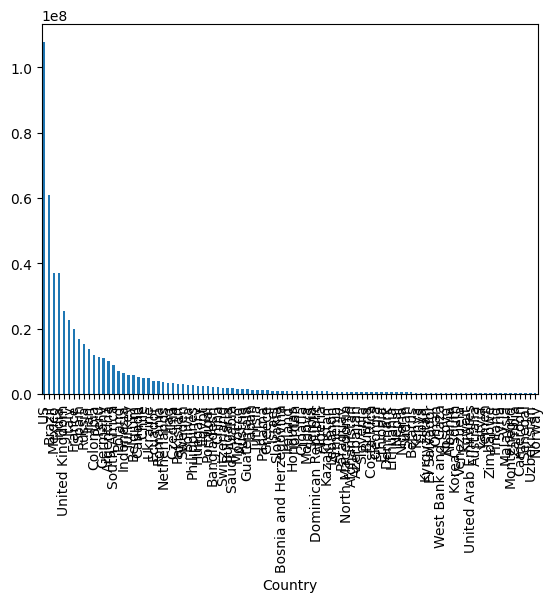

In [ ]:
#plot covid deaths
covid_sum_df.plot(kind='bar')